# Coefficient Initialization

> Tianyu Du
> 
> Added since version `1.0.4`

[From ChatGPT] Coefficient initialization is an essential component of model estimation, especially in the context of machine learning and deep learning. The choice of initial coefficients can dramatically impact the efficiency, speed, and even the ultimate success of model training. Poor initialization can lead to slow convergence during the optimization process or result in the model getting stuck in suboptimal local minima, particularly in models with non-convex loss landscapes such as neural networks. Additionally, it can exacerbate the problem of vanishing or exploding gradients, inhibiting the backpropagation process. Conversely, thoughtful and strategic initialization, like Xavier or He initialization, can lead to faster convergence, better generalization performance, and more robust models. Thus, the way coefficients are initialized can significantly influence the effectiveness and reliability of machine learning models.

In [1]:
import torch
import torch_choice
import matplotlib.pyplot as plt

/Users/tianyudu/miniforge3/envs/dev/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/tianyudu/miniforge3/envs/dev/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  Referenced from: <B3E58761-2785-34C6-A89B-F37110C88A05> /Users/tianyudu/miniforge3/envs/dev/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <AE6DCE26-A528-35ED-BB3D-88890D27E6B9> /Users/tianyudu/miniforge3/envs/dev/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")


# Conditional Logit Models

## By default, coefficients are initialized following a standard Gaussian distribution.

Here we create a "big" model of thousands of parameters to illustrate the distribution of coefficients.

In [2]:
model = torch_choice.model.ConditionalLogitModel(
    coef_variation_dict={'var_1': 'constant', 'var_2': 'item', 'var_3': 'item-full', 'var_4': 'user'},
    num_param_dict={'var_1': 300, 'var_2': 500, 'var_3': 700, 'var_4': 900},
    num_items=4,
    num_users=10)

In [3]:
def plot_model_initial_coefficients(model_to_plot: torch.nn.Module) -> None:
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 4), dpi=150)

    for i, (coef_name, coef_value) in enumerate(model_to_plot.state_dict().items()):
        arr = coef_value.view(-1,).to("cpu").numpy()
        axes[i].hist(arr, bins=40)
        axes[i].set_title(f"{coef_name} (K={len(arr)})")

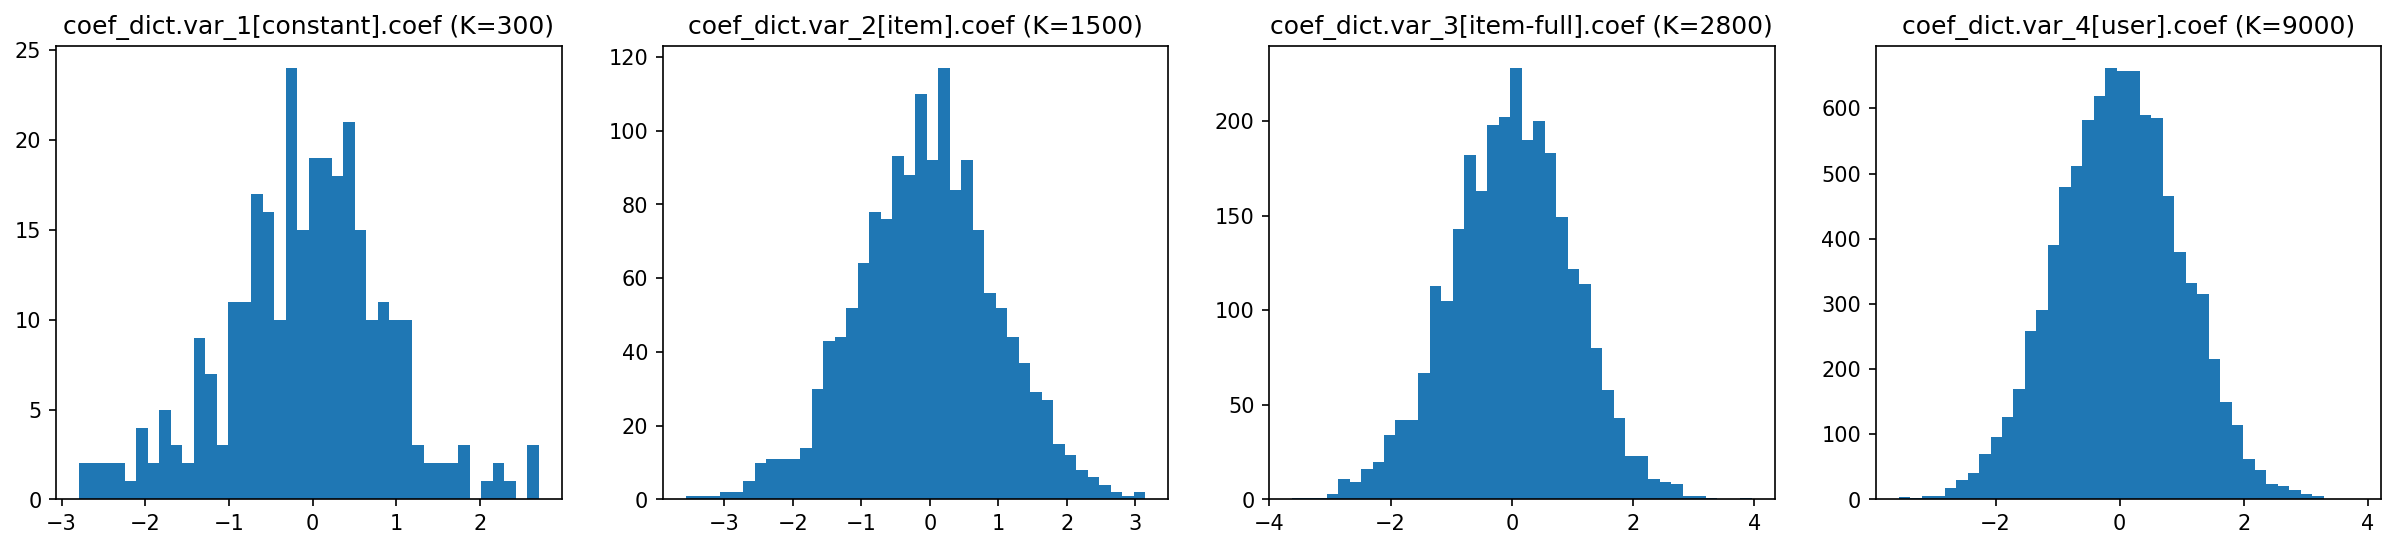

In [4]:
plot_model_initial_coefficients(model)

## Alternatively, you can initialize to uniform or zeros using the `weight_initialization` argument.

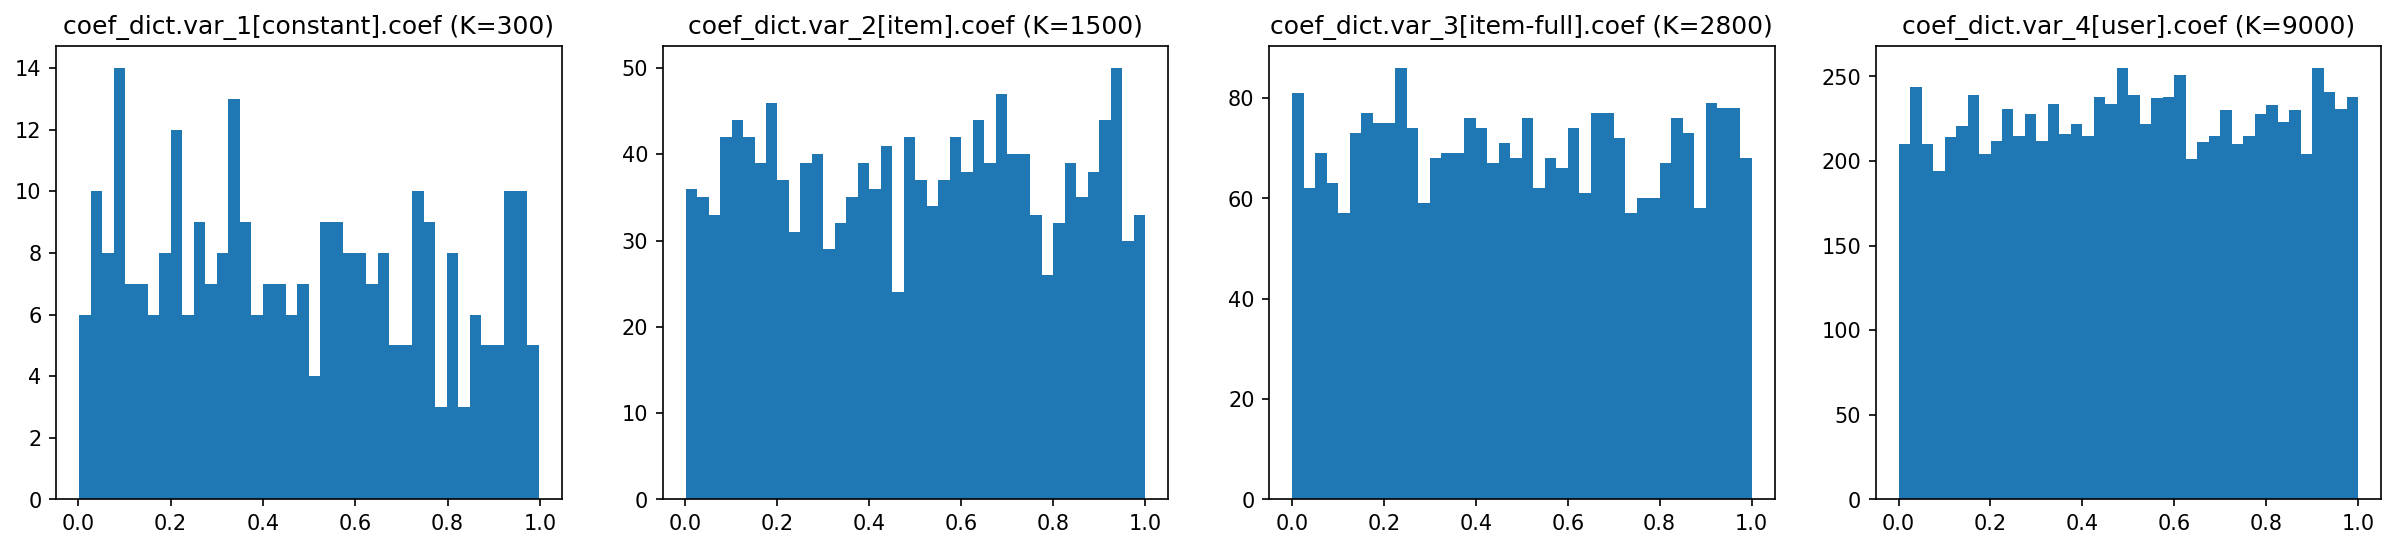

In [5]:
model = torch_choice.model.ConditionalLogitModel(
    coef_variation_dict={'var_1': 'constant', 'var_2': 'item', 'var_3': 'item-full', 'var_4': 'user'},
    num_param_dict={'var_1': 300, 'var_2': 500, 'var_3': 700, 'var_4': 900},
    num_items=4,
    num_users=10,
    weight_initialization="uniform")

plot_model_initial_coefficients(model)

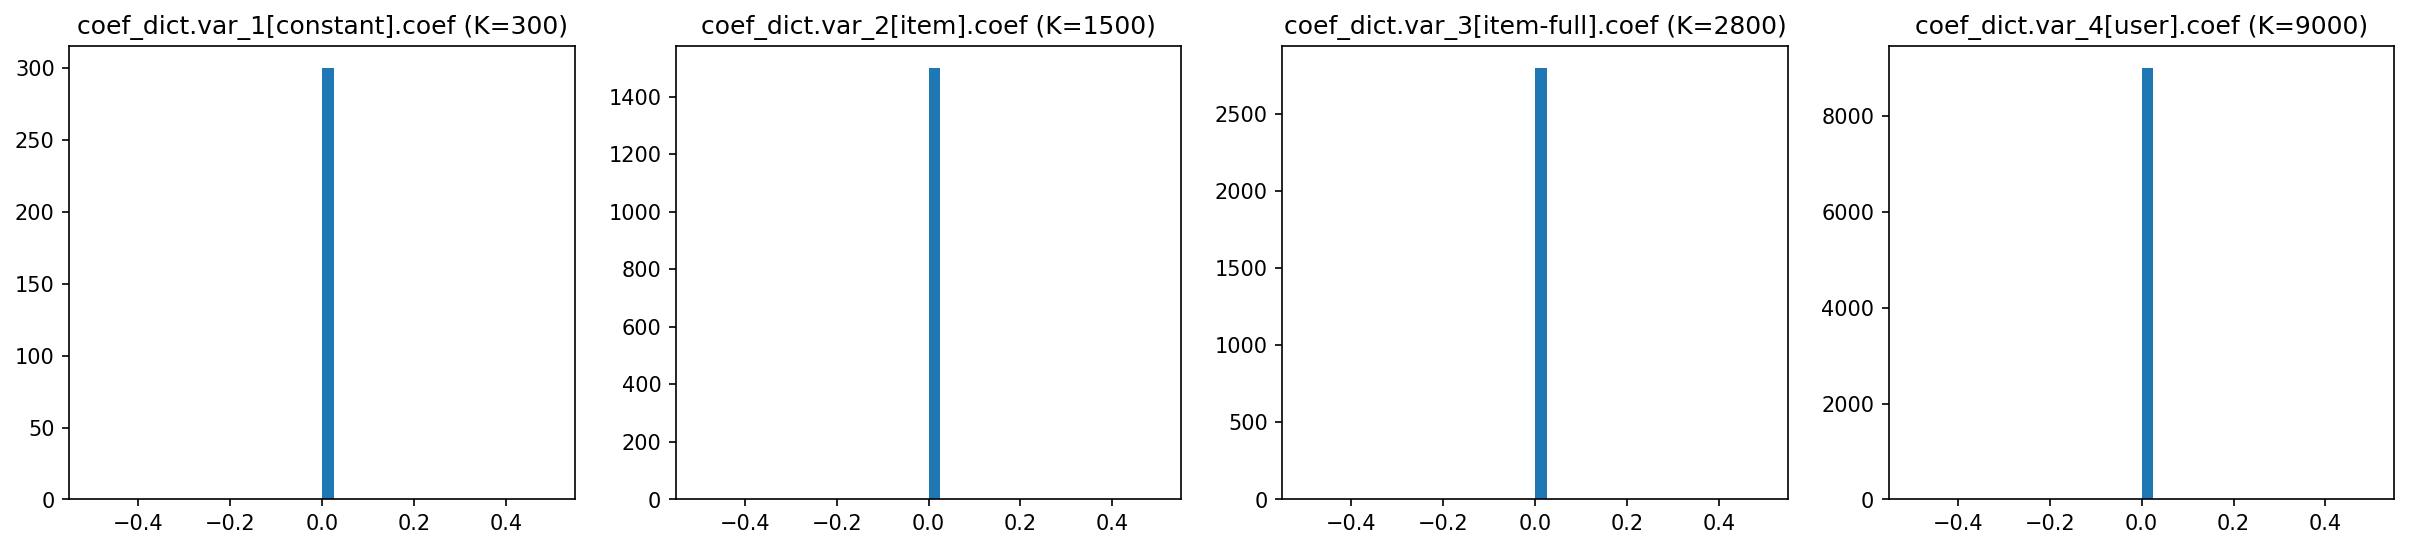

In [6]:
model = torch_choice.model.ConditionalLogitModel(
    coef_variation_dict={'var_1': 'constant', 'var_2': 'item', 'var_3': 'item-full', 'var_4': 'user'},
    num_param_dict={'var_1': 300, 'var_2': 500, 'var_3': 700, 'var_4': 900},
    num_items=4,
    num_users=10,
    weight_initialization="zero")

plot_model_initial_coefficients(model)

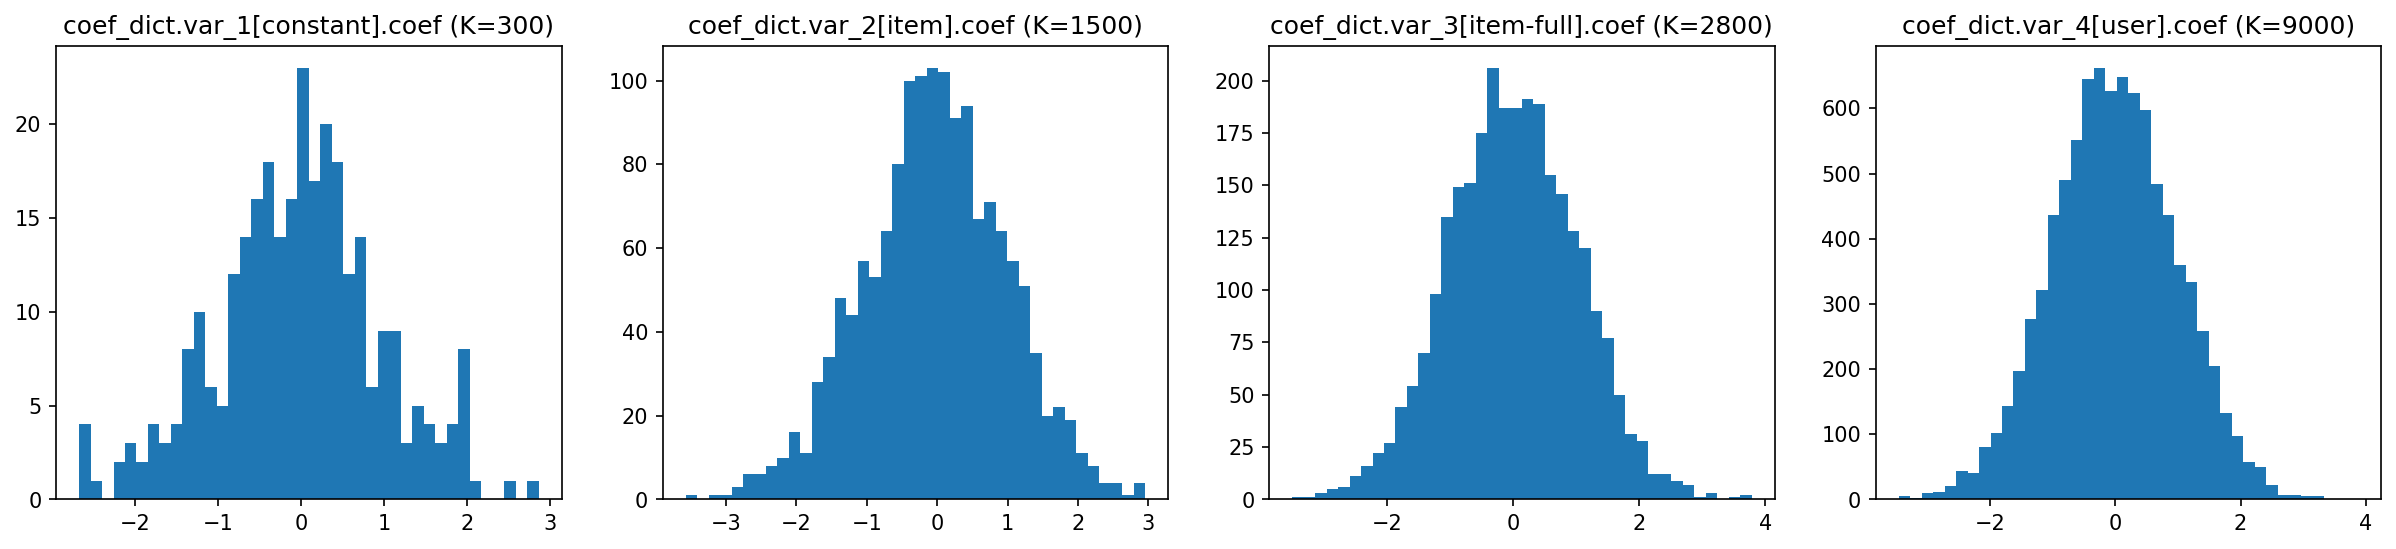

In [7]:
model = torch_choice.model.ConditionalLogitModel(
    coef_variation_dict={'var_1': 'constant', 'var_2': 'item', 'var_3': 'item-full', 'var_4': 'user'},
    num_param_dict={'var_1': 300, 'var_2': 500, 'var_3': 700, 'var_4': 900},
    num_items=4,
    num_users=10,
    weight_initialization="normal")

plot_model_initial_coefficients(model)

## You can initialize different sets of coefficients differently by passing a dictionary to `weight_initialization`. For coefficients not in `weight_initialization`, they are initialized as a standard normal distribution (the default).

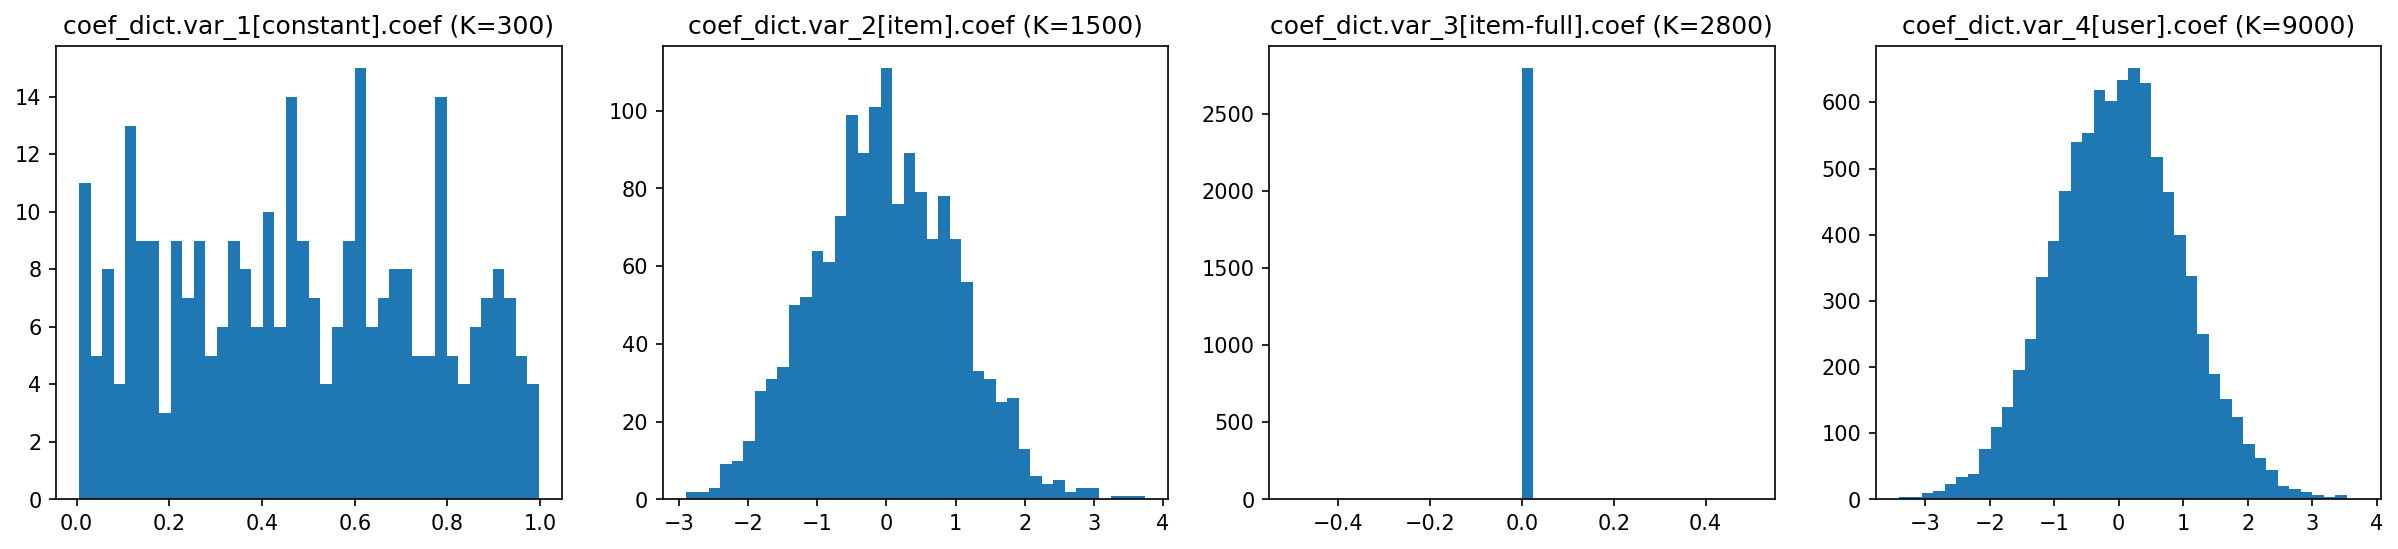

In [8]:
model = torch_choice.model.ConditionalLogitModel(
    coef_variation_dict={'var_1': 'constant', 'var_2': 'item', 'var_3': 'item-full', 'var_4': 'user'},
    num_param_dict={'var_1': 300, 'var_2': 500, 'var_3': 700, 'var_4': 900},
    num_items=4,
    num_users=10,
    weight_initialization={'var_1': 'uniform',
                           'var_2': 'normal',
                           'var_3': 'zero'})  # <-- 'var_4' is missing, and it's initialized using Gaussian.

plot_model_initial_coefficients(model)

## For sure, the model complains if you ask it to initialize using something else...

In [9]:
model = torch_choice.model.ConditionalLogitModel(
    coef_variation_dict={'var_1': 'constant', 'var_2': 'item', 'var_3': 'item-full', 'var_4': 'user'},
    num_param_dict={'var_1': 300, 'var_2': 500, 'var_3': 700, 'var_4': 900},
    num_items=4,
    num_users=10,
    weight_initialization={'var_1': 'a-non-existing-distribution',
                           'var_2': 'normal',
                           'var_3': 'zero'})

ValueError: Unsupported initialization method: a-non-existing-distribution, supported methods are ['zero', 'uniform', 'normal', None]

## You can inspect the method of initialization in the string representation of model coefficients (e.g., `initialization=normal`).

In [10]:
model

ConditionalLogitModel(
  (coef_dict): ModuleDict(
    (var_1[constant]): Coefficient(variation=constant, num_items=4, num_users=10, num_params=300, 300 trainable parameters in total, initialization=uniform, device=cpu).
    (var_2[item]): Coefficient(variation=item, num_items=4, num_users=10, num_params=500, 1500 trainable parameters in total, initialization=normal, device=cpu).
    (var_3[item-full]): Coefficient(variation=item-full, num_items=4, num_users=10, num_params=700, 2800 trainable parameters in total, initialization=zero, device=cpu).
    (var_4[user]): Coefficient(variation=user, num_items=4, num_users=10, num_params=900, 9000 trainable parameters in total, initialization=normal, device=cpu).
  )
)
Conditional logistic discrete choice model, expects input features:

X[var_1[constant]] with 300 parameters, with constant level variation.
X[var_2[item]] with 500 parameters, with item level variation.
X[var_3[item-full]] with 700 parameters, with item-full level variation.
X[va

# Nested Logit Model

Initializing nested logit models is very similar to initializing conditional logit models. The only difference is you need to pass-in two arguments: `nest_weight_initialization` and `item_weight_initialization`. By default, every coefficient is initialized to a standard Gaussian distribution. The coefficient for inclusive values $\lambda$ has its own way of initialization and cannot be modified.

In [11]:
model = torch_choice.model.NestedLogitModel(
    nest_to_item={1: [0, 1, 2], 2: [3, 4], 3: [5, 6, 7]},
    #
    nest_coef_variation_dict={'var_1': 'constant', 'var_2': 'item'},
    nest_num_param_dict={'var_1': 300, 'var_2': 500},
    #
    item_coef_variation_dict={'var_3': 'item-full', 'var_4': 'user'},
    item_num_param_dict={'var_3': 700, 'var_4': 900},
    num_users=100,
    # 
    nest_weight_initialization={'var_1': 'uniform', 'var_2': 'zero'},
    item_weight_initialization={'var_4': 'uniform'}   # <-- var_3 is missing, it is initialized to Gaussian by default.
)

In [12]:
def plot_model_initial_coefficients(model_to_plot: torch.nn.Module) -> None:
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 4), dpi=150)

    for i, (coef_name, coef_value) in enumerate(model_to_plot.state_dict().items()):
        arr = coef_value.view(-1,).to("cpu").numpy()
        axes[i].hist(arr, bins=40)
        axes[i].set_title(f"{coef_name} (K={len(arr)})")

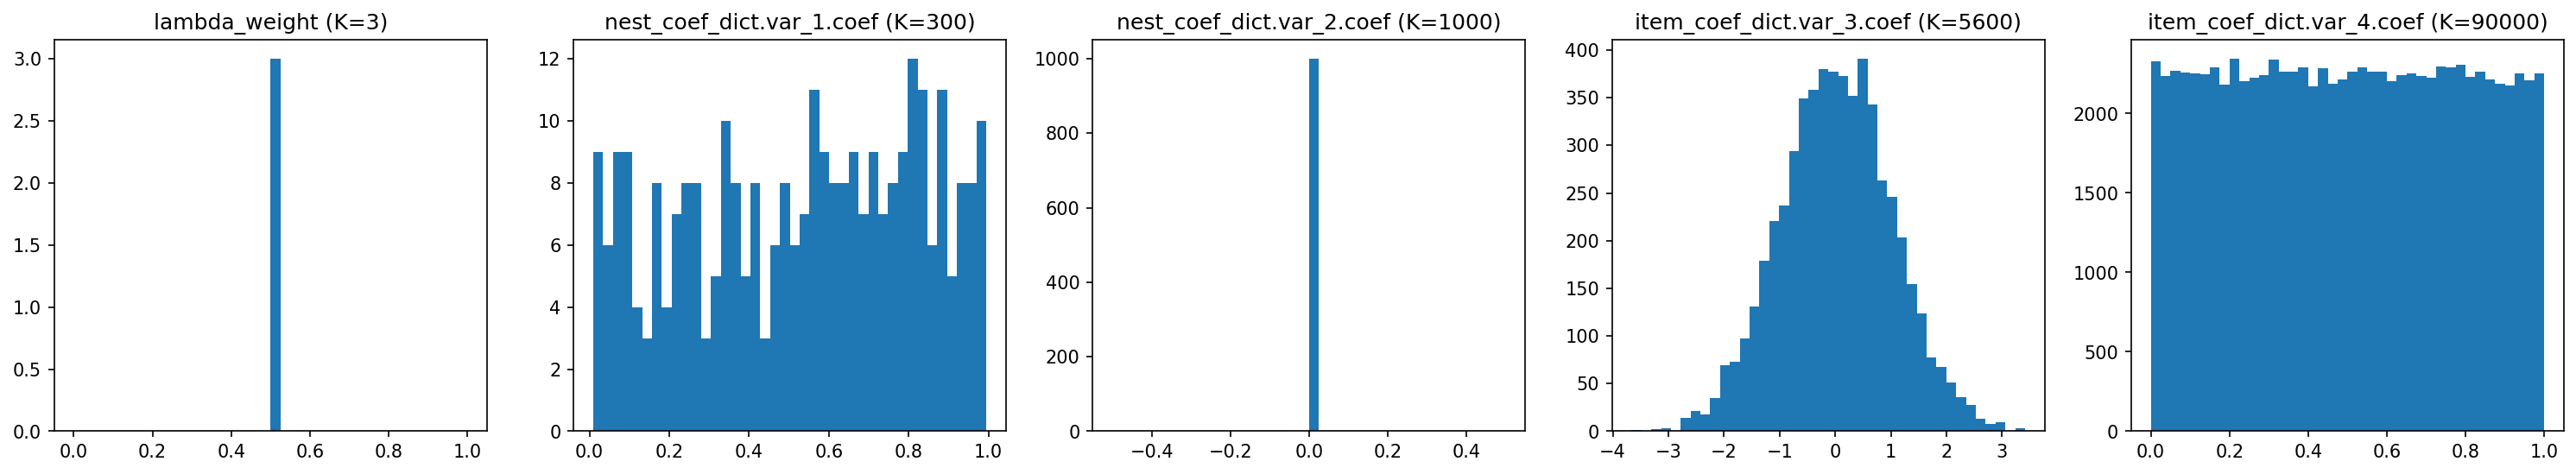

In [13]:
plot_model_initial_coefficients(model)